### Algoritmo: Gradiente Descendente

In [6]:
from typing import Union
import numpy as np
import matplotlib.pyplot as plt

# f(x,y) = 2x^2 + 4y^2, lambda = 0.5, (x0,y0) = (1,2)
def my_function(x, y):
    return x*y*np.exp(-x**2 - y**2)

def gradient(x, y):
    return np.array([(y*np.exp(-x**2 - y**2) - 2*x**2*np.exp(-x**2 - y**2)),
                     x*np.exp(-x**2 - y**2) - 2*y**2*x*np.exp(-x**2 - y**2)])

def gradiente_descendente(x0:float,
                          y0: float,
                          passo:Union[float, bool] = True,
                          max_iter:int = 10,
                          erro_inicial:float = 1.0):

  path = [(x0,y0)]
  nro_iter = 0
  eps = erro_inicial
  while eps > 0.00001 and nro_iter < 10:
    # Passo 1: Calcula a função no ponto inicial
    f_x0_y0 = my_function(x0,y0)

    # Passo 2: Calcula o gradiente da função e aplica no ponto inicial
    grad_x0_y0 = gradient(x0,y0)

    # Passo 3: Normalização do gradiente
    grad_norm = np.linalg.norm(grad_x0_y0)
    n = grad_x0_y0 / grad_norm

    if isinstance(passo, float):
      lambda_ = passo

    else:
      lambda_ = (n[0] * x0 + 2 * n[1] * y0) / (n[0]**2 + 2 * n[1]**2)

    # Passo 4: Calcula o próximo ponto
    x1 = x0 - lambda_ * n[0]
    y1 = y0 - lambda_ * n[1]

    # Passo 5: Calcula a função no próximo ponto
    f_x1_y1 = my_function(x1,y1)

    # Atualização dos valores
    eps = abs(f_x1_y1 - f_x0_y0)
    nro_iter = nro_iter + 1
    path.append((round(float(x1),5),round(float(y1),5)))
    x0 = x1
    y0 = y1

  print("k = ", nro_iter)
  print("x1 = ", x1)
  print("y1 = ", y1)
  print("f(x1,y1) = ", f_x1_y1)
  print("eps=", eps)
  print("Caminho=", path)

  return path

In [7]:
path = gradiente_descendente(x0=0.3,
                      y0=1.2,
                      passo=0.1,
                      max_iter=1000,
                      erro_inicial=1.0)

k =  10
x1 =  -0.5753411917237731
y1 =  1.0095092783366109
f(x1,y1) =  -0.15055088322082164
eps= 0.019169883786574138
Caminho= [(0.3, 1.2), (0.21249, 1.24839), (0.11927, 1.2846), (0.02158, 1.30594), (-0.07835, 1.30992), (-0.17728, 1.29539), (-0.27199, 1.2633), (-0.36019, 1.21616), (-0.44068, 1.15682), (-0.51277, 1.08751), (-0.57534, 1.00951)]


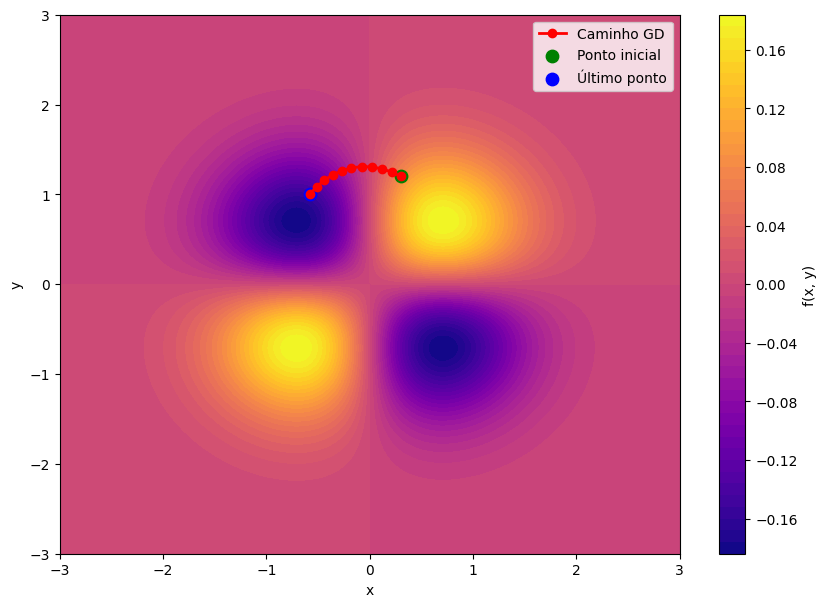

In [8]:
# Função
def f(x, y):
    return x * y * np.exp(-x**2 - y**2)

# Dados da função
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Caminho encontrado
Caminho = path

# -------------------------
# Plot 1: Contorno (2D)
# -------------------------
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=50, cmap="plasma")
plt.colorbar(label="f(x, y)")

# trajetória
xs, ys = zip(*Caminho)
plt.plot(xs, ys, marker="o", color="red", markersize=6, linewidth=2, label="Caminho GD")
plt.scatter(xs[0], ys[0], color="green", s=80, label="Ponto inicial")
plt.scatter(xs[-1], ys[-1], color="blue", s=80, label="Último ponto")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("./Figuras/caminho2d.png", dpi=300)
plt.show()


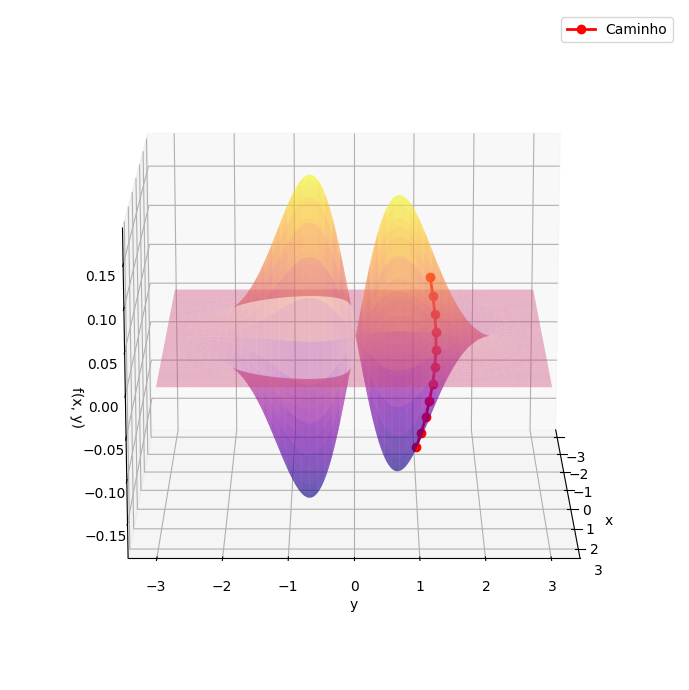

In [9]:
# -------------------------
# Plot 2: Superfície 3D
# -------------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="plasma", alpha=0.4)

# trajetória em 3D
Zs = [f(x, y) for x, y in Caminho]
ax.plot(xs, ys, Zs, marker="o", color="red", markersize=6, linewidth=2, label="Caminho")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.view_init(15, 0)  # ângulo da câmera
plt.legend()
plt.tight_layout()
plt.savefig("./Figuras/superficie3d.png", dpi=300)
plt.show()